<a href="https://colab.research.google.com/github/PhuongTa/ml-course/blob/main/bulldozer_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Sale Price of Bulldozers using ML

In this notebook, we're going to go through an example ml project with the goal of predicting the sale price of bulldozers

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook Bulldozers competition:

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionnary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/12BTZb17-YyC_m_xJ8742sKrT7SQyVTxZ/edit?usp=sharing&ouid=117675940379990159875&rtpof=true&sd=true

## EDA

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse date` parameter.


In [ ]:
# Import data again but this time parse dates
df = pd.read_csv("/content/drive/MyDrive/ml-course/data/bulldozers/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=['saledate'])

In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

In [ ]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

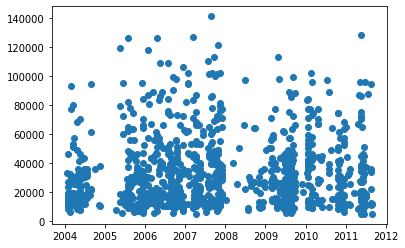

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df["SalePrice"][:1000]);

In [ ]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
df.saledate.head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's good idea to sort it by date

In [ ]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], 
               inplace = True, 
               ascending=True)

df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [ ]:
# Make copy data
df_tmp = df.copy()
#df_tmp.head().T

### Feature Engineering
### Add datetime parameters for `saledate` column

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DatetimeIndex.html

In [ ]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [ ]:
# Now we've enriched our dataframe with date time feature, we can remove saledate
df_tmp.drop(columns=['saledate'], 
            axis=1, 
            inplace= True)

In [ ]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modeling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Convert String to categories

One way we can turn all of our data into numbers is converting them into pandas categories.
We can check the different datatypes compatible with pandas here:
https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html


In [ ]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [ ]:
# Find the columns which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label]= content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.info()

In [ ]:
# Check
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [ ]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Handle missing data

In [ ]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Save Preprocessed data

In [ ]:
# Export current tmp DataFrame
df_tmp.to_csv("/content/drive/MyDrive/ml-course/data/bulldozers/train_tmp.csv",
              index=False)

## Load Preprocessed data

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
# Import preprocessed data
df_temp = pd.read_csv("/content/drive/MyDrive/ml-course/data/bulldozers/train_tmp.csv", low_memory=False)

## Fill missing values

### Fill numerical missing values first

In [ ]:
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [ ]:
df_temp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [ ]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
# Fill numeric rows with the median
# Check for which numeric columns have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was null.
      df_temp[label +"_is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_temp[label] = content.fillna(content.median())
                                                

In [ ]:
#Check again which numerical column have null value
# Check for which numeric columns have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

There are no more numerical columns missing values.

In [ ]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

### Fill Categorical Missing Values
Fill and turning categorical variables into numbers

In [ ]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content): #pd.api.types.is_string_dtype(content):
    if pd.isnull(content).sum():
      print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
pd.Categorical(df_temp["state"])

[44, 9, 9, 9, 9, ..., 5, 5, 5, 5, 5]
Length: 412698
Categories (53, int64): [1, 2, 3, 4, ..., 50, 51, 52, 53]

In [ ]:
pd.Categorical(df_temp["state"]).dtype

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
                  46, 47, 48, 49, 50, 51, 52, 53],
, ordered=False)

In [ ]:
# Check categorical codes
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
# Turn categorical variables into number and fill missing
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample had missing values.
    df_temp[label + "_is_missing"] = pd.isnull(content)
    # Turn categories into number and add + 1
    df_temp[label] = pd.Categorical(content).codes + 1

In [ ]:
pd.Categorical(df_temp["UsageBand"]).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [ ]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content): #pd.api.types.is_string_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [ ]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [ ]:
df_temp.isna().sum()[:-10]

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
                             ..
Coupler_is_missing            0
Coupler_System_is_missing     0
Grouser_Tracks_is_missing     0
Hydraulics_Flow_is_missing    0
Track_Type_is_missing         0
Length: 93, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

## Fitting Model

In [ ]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
len(df_temp)

412698

### Define dataset and Split datasets

### Splitting data into train/validation sets

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012

In [ ]:
df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [ ]:
# Split data into training and validation
df_train = df_temp[df_temp.saleYear != 2012]
df_val = df_temp[df_temp.saleYear == 2012]

len(df_train), len(df_val)

(401125, 11573)

In [ ]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice

X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape,y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [ ]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_test, y_preds):
  """
  Calculate root mean squared log error between predictions and true label.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create function to evaluate model on a feww different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores={"Training MAE": mean_absolute_error(y_train, train_preds),
          "Valid MAE": mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, train_preds),
          "Valid RMSLE": rmsle(y_valid, val_preds),
          "Training R^2": r2_score(y_train, train_preds),
          "Valid R^2": r2_score(y_valid, val_preds)}
  
  return scores


## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# THis takes too long... for experimenting (401125 samples)
# %%time
# model = RandomForestRegressor(n_job=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

### Reduce samples

In [ ]:
# Change max_samples value
# max_sample: limit the sample in each n_estimator
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000,
                              n_estimators=100)

In [ ]:
%%time
# Cutting down on the max number of samples each estimator can see 
# improve training time.
model.fit(X_train, y_train)


CPU times: user 41.3 s, sys: 679 ms, total: 42 s
Wall time: 26.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [ ]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV


# Different RandomForestRegressor hyperparameters
rf_grid={"n_estimators": np.arange(10, 100, 10),
         "max_depth": [None, 3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features":[0.5, 1, "sqrt","auto"],
         "max_samples":[12000]}

# Instatiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)         

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

CPU times: user 38.3 s, sys: 5.59 s, total: 43.9 s
Wall time: 2min 25s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
# Evaluate the RandomizedSearchCV
show_scores(rs_model)

{'Training MAE': 6184.573624945175,
 'Valid MAE': 7760.117002396658,
 'Training RMSLE': 0.28004112521750657,
 'Valid RMSLE': 0.309833165446084,
 'Training R^2': 0.8261418391576748,
 'Valid R^2': 0.7956870624650766}

### Try to find the best max_samples


In [ ]:

# the list of max_samples_list
max_samples_list = [0.04, 0.05, 0.1, 0.2, 0.3]

# Instatiate RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10)

# Using cross-validate to valuate performance of max_samples
scores = []
for max_samples in max_samples_list:
    rf.max_samples = max_samples
    cv_score = np.mean(cross_val_score(rf, 
                                       X_train, 
                                       y_train, 
                                       cv=5, 
                                       scoring='neg_mean_squared_error'))
    scores.append(-cv_score)

# find the best max_samples with highest score.
optimal_idx = np.argmax(scores)
optimal_max_samples = max_samples_list[optimal_idx]
print('The optimal max_samples:', optimal_max_samples)

Giá trị max_samples tối ưu: 0.3


In [ ]:
optimal_max_samples*len(X_train)

120337.5

### Try to build model with max_samples = 12k

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV


# Different RandomForestRegressor hyperparameters
rf_grid={"n_estimators": np.arange(10, 100, 10),
         "max_depth": [None, 3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2),
         "max_features":[0.5, 1, "sqrt","auto"],
         "max_samples":[optimal_max_samples]}

# Instatiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)         

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

CPU times: user 1min 54s, sys: 5.75 s, total: 2min
Wall time: 11min 45s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [0.3],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [ ]:
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_samples': 0.3,
 'max_features': 'auto',
 'max_depth': 10}

In [ ]:
# Evaluate on rs_model (only trained on ~12,000 examples)
show_scores(rs_model)

{'Training MAE': 6467.180167858985,
 'Valid MAE': 7722.750821376715,
 'Training RMSLE': 0.2915820462456334,
 'Valid RMSLE': 0.31131576716352105,
 'Training R^2': 0.818613065463057,
 'Valid R^2': 0.8000523054784309}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomForestSearchCV`

In [ ]:
%%time

#Most ideal Hyperarameters ~400K samples
ideal_model =  RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
# Fit the ideal model
ideal_model.fit(X_train, y_train)


CPU times: user 3min 41s, sys: 533 ms, total: 3min 41s
Wall time: 2min 17s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [ ]:
# Save ideal_model
import pickle
pickle.dump(ideal_model, open("/content/drive/MyDrive/ml-course/data/bulldozers/ideal_model.pkl","wb"))

## Load a save model

In [ ]:
#Load a saved model
loaded_model = pickle.load(open("/content/drive/MyDrive/ml-course/data/bulldozers/ideal_model.pkl","rb"))

In [ ]:
# column feature name
cols_model_builds = loaded_model.
cols_model_builds

AttributeError: ignored

In [ ]:
# Score for ideal model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [ ]:
# Evaluate on rs_model (only trained on ~12,000 examples)
show_scores(rs_model)

{'Training MAE': 6467.180167858985,
 'Valid MAE': 7722.750821376715,
 'Training RMSLE': 0.2915820462456334,
 'Valid RMSLE': 0.31131576716352105,
 'Training R^2': 0.818613065463057,
 'Valid R^2': 0.8000523054784309}

## Make predictions on test data

In [ ]:
# import test data
df_test = pd.read_csv("/content/drive/MyDrive/ml-course/data/bulldozers/Test.csv", 
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing test set (getting the test dataset in the same format as our training dataset)

In [ ]:
def preprocess_data(df):
  """
  Performs transformations on df and returns transformed df.
  """
  
  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear

  df.drop('saledate', axis = 1, inplace= True)

  # Fill numeric rows with median
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df[label +"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        df[label] = content.fillna(content.median())
    
    # Fill categorical missing data and turn categories into numbers
    if not pd.api.types.is_numeric_dtype(content):
      df[label + "_is_missing"] = pd.isnull(content)
      # We add +1 to the category code because pandas encodes missing categories -1
      df[label] = pd.Categorical(content).codes + 1

  return df

In [ ]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
X_train.shape, df_test.shape

((401125, 102), (12457, 101))

In [ ]:
# We can find how the columns differ using set
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

X_train, X_test differ shape because test set doesn't have `auctioneerID`

In [ ]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.shape

(12457, 102)

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [ ]:
# Make predicitons on updated test date
test_preds = ideal_model.predict(df_test)

ValueError: ignored

In [ ]:
test_preds